In [ ]:
import sklearn
import pandas as pd

In [ ]:
# load the data
from sklearn.datasets import load_breast_cancer   # specific data to download from their site
data = load_breast_cancer()
print(data.feature_names)
print(data.target_names)

In [ ]:
data

In [ ]:
data.target                       # malignant or benign

In [122]:
# print the encoding scheme for diagnosis: 0 = malignant????, 1 = benign
print(data.target_names)

['malignant' 'benign']


# convert to pandas to view the data

In [123]:
data_df = pd.DataFrame(data.data, columns=data.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [127]:
# add the target to the df
data_df['target'] = pd.DataFrame(data.target)
data_df.tail(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
data_df.info

In [ ]:
data_df.describe()

## Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib


In [ ]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

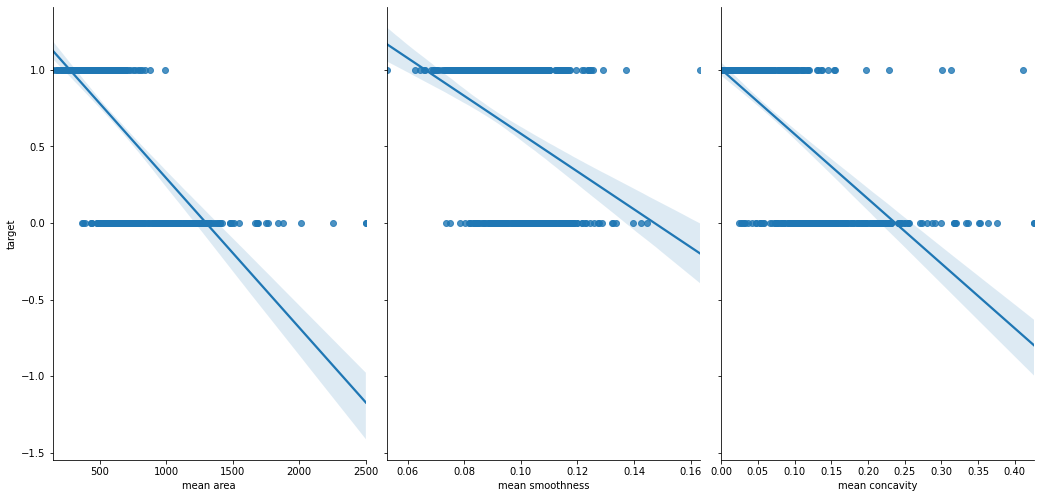

In [128]:
#visualize the relationship between the features and the response using scatterplots
#sns.pairplot(hubble, height=7, aspect=0.7, kind='reg')
sns.pairplot(data_df, x_vars=['mean area','mean smoothness','mean concavity'], y_vars=['target'], height=7, aspect=0.7, kind='reg')

# Feature Selection for Numerical Input

# training the Model

In [ ]:
# use the list to select a subset of the original DataFrame
X = data.data
# check the type and shape of X
print(type(X))
print(X.shape)

In [ ]:
# select a Series from the DataFrame as target!
y = data.target
print(type(y))
print(y.shape)

# # Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)  # random_state= Controls the shuffling applied to the data before applying the split.
# # default split is 75% for training and 25% for testing

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## linear regression

In [ ]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

### Interpreting model coefficients

In [ ]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

### Making predictions

In [ ]:
y_predict = linreg.predict(X_test)
y_predict.round()

In [ ]:
y_test

**Step 1:** Import the class you plan to use 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn

**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [ ]:
knn.fit(X_train, y_train)

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [ ]:
knn1_predict = knn.predict(X_test)  
knn1_predict

In [ ]:
y_test

## Using a different value for K

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

In [ ]:
knn5_predict = knn5.predict(X_test)    # store to vrable for model evaluation

# Evaluation of the models

In [ ]:
# print the no of prediction per model:
print(len(y_predict))
print(len(knn1_predict))
print(len(knn5_predict))

Classification accuracy:

- **Proportion** of correct predictions
- Common **evaluation metric** for classification problems

In [ ]:
from sklearn import metrics
print("knn-1: ", metrics.accuracy_score(y_test, knn1_predict))
print("knn-5: ", metrics.accuracy_score(y_test, knn5_predict))

In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [ ]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
logreg_predict = logreg.predict(X_test)
print("logreg: ", metrics.accuracy_score(y_test, logreg_predict))

## The best model for this data!

# Cross-validation for parameter tuning, model selection, and feature selection

In [ ]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

## Steps for K-fold cross-validation

**Question:** What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

**Answer:** That's the essense of cross-validation!

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

In [ ]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

## Cross-validation recommendations

1. K can be any number, but **K=10** is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

In [ ]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

In [ ]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

**Goal:** Compare the best KNN model with logistic regression on the iris dataset

In [ ]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=12)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

In [ ]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

# Logistic regression is better than KNN model for these data